# **Classification**


#Dataset


In [0]:
!gdown --id '1KSFIRh0-_Vr7SdiSCZP1ItV7bXPxMD92' --output data.tar.gz
!tar -zxvf data.tar.gz
!ls

Downloading...
From: https://drive.google.com/uc?id=1KSFIRh0-_Vr7SdiSCZP1ItV7bXPxMD92
To: /content/data.tar.gz
6.11MB [00:00, 53.5MB/s]
data/
data/sample_submission.csv
data/test_no_label.csv
data/train.csv
data/X_test
data/X_train
data/Y_train
data  data.tar.gz  sample_data


#Logistic Regression



In [0]:
import numpy as np

np.random.seed(0)
X_train_fpath = './data/X_train'
Y_train_fpath = './data/Y_train'
X_test_fpath = './data/X_test'
output_fpath = './output_{}.csv'

# Parse csv files to numpy array
with open(X_train_fpath) as f:
    next(f)
    X_train = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)
with open(Y_train_fpath) as f:
    next(f)
    Y_train = np.array([line.strip('\n').split(',')[1] for line in f], dtype = float)
with open(X_test_fpath) as f:
    next(f)
    X_test = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)

# Preproscessing

In [0]:
import numpy as np
x_path = './data/train.csv'
with open(x_path) as f:
    data = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = str)
x_path = './data/test_no_label.csv'
with open(x_path) as f:
    next(f)
    data2 = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = str)

In [0]:
addy = np.array([[' 50000+.'] * 27622]) # 隨意補y
data2y = np.column_stack((data2,addy.T)) 

In [0]:
data2y

array([['37', ' Private', ' 42', ..., ' 52', ' 95', ' 50000+.'],
       ['48', ' Private', ' 31', ..., ' 52', ' 95', ' 50000+.'],
       ['68', ' Not in universe', ' 0', ..., ' 0', ' 94', ' 50000+.'],
       ...,
       ['38', ' Private', ' 34', ..., ' 52', ' 95', ' 50000+.'],
       ['17', ' Not in universe', ' 0', ..., ' 40', ' 94', ' 50000+.'],
       ['22', ' Not in universe', ' 0', ..., ' 25', ' 94', ' 50000+.']],
      dtype='<U48')

In [0]:
alldata = np.concatenate((data, data2y), axis=0)

In [0]:
len(alldata) # 0-54256 + 54257-81878

81879

In [0]:
alldata

array([['age', 'class of worker', 'detailed industry recode', ...,
        'weeks worked in year', 'year', 'y'],
       ['33', ' Private', ' 34', ..., ' 52', ' 95', ' 50000+.'],
       ['63', ' Private', ' 7', ..., ' 52', ' 95', ' - 50000.'],
       ...,
       ['38', ' Private', ' 34', ..., ' 52', ' 95', ' 50000+.'],
       ['17', ' Not in universe', ' 0', ..., ' 40', ' 94', ' 50000+.'],
       ['22', ' Not in universe', ' 0', ..., ' 25', ' 94', ' 50000+.']],
      dtype='<U48')

In [0]:
data_label = alldata.copy()

In [0]:
len(data_label[0])

41

# LabelEncoding

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in range(len(data_label[0])):
  if i not in [0, 5, 16, 17, 18, 29, 38]: # 連續型變數不做
    data_label[1:, i] = labelencoder.fit_transform(data_label[1:,i])

# OnehotEncoding

In [0]:
import pandas as pd
data_onehot = pd.DataFrame(data_label) 

In [0]:
data_onehot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,y
1,33,4,28,19,14,0,2,2,7,0,1,0,0,1,3,1,0,0,0,2,3,36,35,7,0,0,0,1,0,6,4,3,3,37,0,2,1,2,52,1,1
2,63,4,49,15,16,0,2,4,10,0,4,0,0,1,3,1,0,0,0,5,3,36,21,4,0,0,0,1,0,4,4,0,0,40,4,0,1,2,52,1,0
3,71,3,0,0,5,0,2,2,14,6,4,0,1,1,3,2,0,0,0,1,3,36,19,4,0,0,0,1,0,0,4,11,40,40,4,0,1,2,0,1,0
4,43,1,38,2,9,0,2,2,5,10,4,0,0,2,3,1,0,0,0,2,3,36,35,7,0,0,0,1,0,6,4,40,40,40,4,0,1,2,52,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81874,42,0,44,7,9,0,2,4,18,13,4,0,1,1,5,0,0,0,0,5,4,39,19,4,3,8,9,0,3,6,4,40,40,40,4,0,0,1,9,0,1
81875,40,4,11,33,16,1600,2,2,11,14,2,0,1,0,3,1,0,0,0,2,3,36,19,4,0,0,0,1,0,5,4,40,40,40,4,0,1,2,52,1,1
81876,38,4,28,9,14,0,2,2,7,12,4,0,1,1,3,1,0,0,0,2,3,36,19,4,0,0,0,1,0,6,4,40,40,40,4,0,1,2,52,1,1
81877,17,3,0,0,1,0,1,4,14,6,4,0,0,1,3,0,0,0,0,4,3,36,8,2,7,6,7,2,2,1,0,40,40,40,4,0,1,2,40,0,1


In [0]:
data_onehot = pd.DataFrame(data_onehot.values[1:])

In [0]:
data_onehot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,33,4,28,19,14,0,2,2,7,0,1,0,0,1,3,1,0,0,0,2,3,36,35,7,0,0,0,1,0,6,4,3,3,37,0,2,1,2,52,1,1
1,63,4,49,15,16,0,2,4,10,0,4,0,0,1,3,1,0,0,0,5,3,36,21,4,0,0,0,1,0,4,4,0,0,40,4,0,1,2,52,1,0
2,71,3,0,0,5,0,2,2,14,6,4,0,1,1,3,2,0,0,0,1,3,36,19,4,0,0,0,1,0,0,4,11,40,40,4,0,1,2,0,1,0
3,43,1,38,2,9,0,2,2,5,10,4,0,0,2,3,1,0,0,0,2,3,36,35,7,0,0,0,1,0,6,4,40,40,40,4,0,1,2,52,1,0
4,57,1,35,26,16,0,2,6,6,7,0,0,0,1,3,1,0,0,0,0,3,36,19,4,0,0,0,1,0,6,4,40,40,40,4,0,1,2,52,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81873,42,0,44,7,9,0,2,4,18,13,4,0,1,1,5,0,0,0,0,5,4,39,19,4,3,8,9,0,3,6,4,40,40,40,4,0,0,1,9,0,1
81874,40,4,11,33,16,1600,2,2,11,14,2,0,1,0,3,1,0,0,0,2,3,36,19,4,0,0,0,1,0,5,4,40,40,40,4,0,1,2,52,1,1
81875,38,4,28,9,14,0,2,2,7,12,4,0,1,1,3,1,0,0,0,2,3,36,19,4,0,0,0,1,0,6,4,40,40,40,4,0,1,2,52,1,1
81876,17,3,0,0,1,0,1,4,14,6,4,0,0,1,3,0,0,0,0,4,3,36,8,2,7,6,7,2,2,1,0,40,40,40,4,0,1,2,40,0,1


In [0]:
onehotlist = []
for i in range(41):
  if i not in [0, 5, 16, 17, 18, 29, 38]:
    onehotlist.append(i)
data_onehot = pd.get_dummies(data_onehot, columns = onehotlist)
data_onehot

,0,5,16,17,18,29,38,1_0,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,2_0,2_1,2_10,2_11,2_12,2_13,2_14,2_15,2_16,2_17,2_18,2_19,2_2,2_20,2_21,2_22,2_23,2_24,2_25,2_26,2_27,2_28,2_29,2_3,...,33_28,33_29,33_3,33_30,33_31,33_32,33_33,33_34,33_35,33_36,33_37,33_38,33_39,33_4,33_40,33_41,33_42,33_5,33_6,33_7,33_8,33_9,34_0,34_1,34_2,34_3,34_4,35_0,35_1,35_2,36_0,36_1,36_2,37_0,37_1,37_2,39_0,39_1,40_0,40_1
0,33,0,0,0,0,6,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1
1,63,0,0,0,0,4,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,1,0
2,71,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,1,0
3,43,0,0,0,0,6,52,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,1,0
4,57,0,0,0,0,6,52,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81873,42,0,0,0,0,6,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1
81874,40,1600,0,0,0,5,52,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1
81875,38,0,0,0,0,6,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1
81876,17,0,0,0,0,1,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1


In [0]:
data_onehot = np.array(data_onehot)

In [0]:
data_onehot[:, 3][:100]

array([' 0', ' 0', ' 0', ' 0', ' 0', ' 1902', ' 0', ' 0', ' 0', ' 0',
       ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0',
       ' 2415', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0',
       ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0',
       ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0',
       ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0',
       ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0',
       ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0',
       ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0',
       ' 0', ' 0', ' 0'], dtype=object)

In [0]:
data_onehot[:, 10]

array([0, 0, 1, ..., 0, 1, 1], dtype=object)

In [0]:
X_train = data_onehot[:54256, :-2].astype(float)
X_test = data_onehot[54256:, :-2].astype(float)
Y_train = data_onehot[:54256, -1].astype(float)

In [0]:
Y_train.shape

(54256,)

In [0]:
X_test

array([[37.,  0.,  0., ...,  1.,  0.,  1.],
       [48.,  0.,  0., ...,  1.,  0.,  1.],
       [68.,  0.,  0., ...,  1.,  1.,  0.],
       ...,
       [38.,  0.,  0., ...,  1.,  0.,  1.],
       [17.,  0.,  0., ...,  1.,  1.,  0.],
       [22.,  0.,  0., ...,  1.,  1.,  0.]])

In [0]:
X_train[0]

array([33.,  6., 52., ...,  1.,  0.,  1.])

In [0]:
def _normalize(X, train = True, specified_column = None, X_mean = None, X_std = None):
    # This function normalizes specific columns of X.
    # The mean and standard variance of training data will be reused when processing testing data.
    #
    # Arguments:
    #     X: data to be processed
    #     train: 'True' when processing training data, 'False' for testing data
    #     specific_column: indexes of the columns that will be normalized. If 'None', all columns
    #         will be normalized.
    #     X_mean: mean value of training data, used when train = 'False'
    #     X_std: standard deviation of training data, used when train = 'False'
    # Outputs:
    #     X: normalized data
    #     X_mean: computed mean value of training data
    #     X_std: computed standard deviation of training data

    if specified_column == None:
        specified_column = np.arange(X.shape[1]) # np.arrange可轉成 0:x 之格式
    if train:
         X_mean = np.mean(X[:, specified_column] ,0).reshape(1, -1)
         X_std  = np.std(X[:, specified_column], 0).reshape(1, -1)

    X[:,specified_column] = (X[:, specified_column] - X_mean) / (X_std + 1e-8)
    return X, X_mean, X_std

def _train_dev_split(X, Y, dev_ratio = 0.25):
    # This function spilts data into training set and development set.
    train_size = int(len(X) * (1 - dev_ratio))
    return X[:train_size], Y[:train_size], X[train_size:], Y[train_size:]

# Normalize training and testing data
X_train, X_mean, X_std = _normalize(X_train, train = True, specified_column = None) # one-hot 後還是要normalize
X_test, _, _= _normalize(X_test, train = False, specified_column = None, X_mean = X_mean, X_std = X_std)
# 回傳的東西不重要，因此用＿

# Split data into training set and development set
dev_ratio = 0.1
X_train, Y_train, X_dev, Y_dev = _train_dev_split(X_train, Y_train, dev_ratio = dev_ratio)

train_size = X_train.shape[0]
dev_size = X_dev.shape[0]
test_size = X_test.shape[0]
data_dim = X_train.shape[1]
print('Size of training set: {}'.format(train_size))
print('Size of development set: {}'.format(dev_size))
print('Size of testing set: {}'.format(test_size))
print('Dimension of data: {}'.format(data_dim))

Size of training set: 48830
Size of development set: 5426
Size of testing set: 27622
Dimension of data: 508


In [0]:
Y_train.shape

(48830,)


###Some Useful Functions

Some functions that will be repeatedly used when iteratively updating the parameters.

這幾個函數可能會在訓練迴圈中被重複使用到。

In [0]:
def _shuffle(X, Y):
    # This function shuffles two equal-length list/array, X and Y, together.
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    return (X[randomize], Y[randomize])

def _sigmoid(z):
    # Sigmoid function can be used to calculate probability.
    # To avoid overflow, minimum/maximum output value is set.
    #return np.clip(1 / (1.0 + np.exp(np.clip(-z, None, 22))), 1e-8, 1 - (1e-8))
    return np.clip(1 / (1.0 + np.exp(np.clip(-z, None, 22))), 1e-8, 1 - (1e-8))
    # 避免 log(1) = 0

def _f(X, w, b):
    # This is the logistic regression function, parameterized by w and b
    #
    # Arguements:
    #     X: input data, shape = [batch_size, data_dimension]
    #     w: weight vector, shape = [data_dimension, ]
    #     b: bias, scalar
    # Output:
    #     predicted probability of each row of X being positively labeled, shape = [batch_size, ]
    return _sigmoid(np.matmul(X, w) + b)
    # np.matmul 同 np.dot ，但無法乘以純量

def _predict(X, w, b):
    # This function returns a truth value prediction for each row of X 
    # by rounding the result of logistic regression function.
    return np.round(_f(X, w, b)).astype(np.int)
    # 四捨五入
    
def _accuracy(Y_pred, Y_label):
    # This function calculates prediction accuracy
    acc = 1 - np.mean(np.abs(Y_pred - Y_label))
    return acc

### Functions about gradient and loss



In [0]:
def _cross_entropy_loss(y_pred, Y_label):
    # This function computes the cross entropy.
    #
    # Arguements:
    #     y_pred: probabilistic predictions, float vector
    #     Y_label: ground truth labels, bool vector
    # Output:
    #     cross entropy, scalar
    cross_entropy = -np.dot(Y_label, np.log(y_pred)) - np.dot((1 - Y_label), np.log(1 - y_pred)) # 此處可能會產生 np.log(1) = 0
    return cross_entropy

def _gradient(X, Y_label, w, b):
    # This function computes the gradient of cross entropy loss with respect to weight w and bias b.
    y_pred = _f(X, w, b)
    pred_error = Y_label - y_pred
    w_grad = -np.sum(pred_error * X.T, 1) # * 會自動調整前後順序
    b_grad = -np.sum(pred_error)
    return w_grad, b_grad

In [0]:
np.zeros((data_dim,)).shape 

(508,)

### Training



In [0]:
# Zero initialization for weights ans bias
w = np.zeros((data_dim,)) 
b = np.zeros((1,))

# Some parameters for training    
max_iter = 100
batch_size = 8
learning_rate = 0.2

# Keep the loss and accuracy at every iteration for plotting
train_loss = []
dev_loss = []
train_acc = []
dev_acc = []

# Calcuate the number of parameter updates
step = 1

# Iterative training
for epoch in range(max_iter):
    # Random shuffle at the begging of each epoch
    X_train, Y_train = _shuffle(X_train, Y_train)
        
    # Mini-batch training
    print(epoch)
    for idx in range(int(np.floor(train_size / batch_size))):
        X = X_train[idx*batch_size:(idx+1)*batch_size]
        Y = Y_train[idx*batch_size:(idx+1)*batch_size]

        # Compute the gradient
        w_grad, b_grad = _gradient(X, Y, w, b)
            
        # gradient descent update
        # learning rate decay with time
        w = w - learning_rate/np.sqrt(step) * w_grad
        b = b - learning_rate/np.sqrt(step) * b_grad

        step = step + 1
    print(w)
    # Compute loss and accuracy of training set and development set
    y_train_pred = _f(X_train, w, b)
    Y_train_pred = np.round(y_train_pred)
    train_acc.append(_accuracy(Y_train_pred, Y_train))
    train_loss.append(_cross_entropy_loss(y_train_pred, Y_train) / train_size)

    y_dev_pred = _f(X_dev, w, b)
    Y_dev_pred = np.round(y_dev_pred)
    dev_acc.append(_accuracy(Y_dev_pred, Y_dev))
    dev_loss.append(_cross_entropy_loss(y_dev_pred, Y_dev) / dev_size)
    # Development Set 即為 Validation Set

print('Training loss: {}'.format(train_loss[-1]))
print('Development loss: {}'.format(dev_loss[-1]))
print('Training accuracy: {}'.format(train_acc[-1]))
print('Development accuracy: {}'.format(dev_acc[-1]))

Streaming output truncated to the last 5000 lines.
  2.00044495e-02 -5.70592428e-03  8.99350790e-02 -3.63566364e-02
  1.19303483e-01 -1.24428349e-01  3.78411953e-02 -8.19518060e-01
  1.24428349e-01  6.86346308e-01  3.67441747e-02 -3.67441747e-02]
61
[ 5.77004262e-01 -5.20846685e-04  1.11945748e+00  2.42018986e-01
  6.58883006e-01  3.50180315e-01  8.05889155e-01  2.05766715e-02
 -1.03465454e-01  7.18745444e-02  1.17637346e-02  7.00299014e-03
  1.23885101e-01  2.90793035e-02 -1.13442357e-01 -3.61474566e-02
  1.89135721e-02 -1.49990887e-02 -5.63319736e-02 -5.02807895e-02
  5.09745751e-04  2.89724144e-02 -1.49824875e-02 -1.35061835e-02
  3.68487088e-02 -9.90285318e-03  6.19571818e-02  4.21000789e-02
 -6.16039535e-01 -2.58792943e-03 -2.67169005e-02  3.90444475e-02
  3.39855454e-02  2.93395844e-02  2.27882930e-02  2.48814088e-05
 -6.91149821e-02  2.35274483e-02 -1.27343520e-02  3.51817592e-02
 -3.28337232e-02  3.32183035e-02 -1.41542540e-02 -3.00829478e-02
  1.60830314e-02  2.34984060e-03 -1

### Plotting Loss and accuracy curve

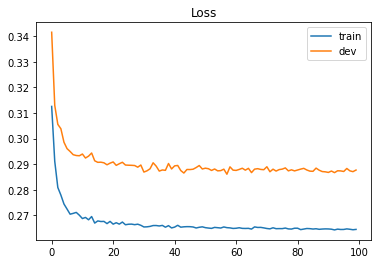

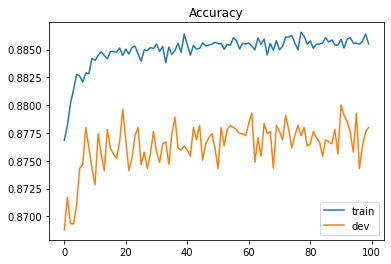

In [0]:
import matplotlib.pyplot as plt

# Loss curve
plt.plot(train_loss)
plt.plot(dev_loss)
plt.title('Loss')
plt.legend(['train', 'dev'])
plt.savefig('loss.png')
plt.show()

# Accuracy curve
plt.plot(train_acc)
plt.plot(dev_acc)
plt.title('Accuracy')
plt.legend(['train', 'dev'])
plt.savefig('acc.png')
plt.show()

###Predicting testing labels

Predictions are saved to *output_logistic.csv*.

預測測試集的資料標籤並且存在 *output_logistic.csv* 中。

In [0]:
# Predict testing labels
np.random.seed(0)
X_train_fpath = './data/X_train'
Y_train_fpath = './data/Y_train'
X_test_fpath = './data/X_test'
output_fpath = './output_{}.csv'
predictions = _predict(X_test, w, b)
with open(output_fpath.format('logistic'), 'w') as f:
    f.write('id,label\n')
    for i, label in  enumerate(predictions):
        print(i, label)
        f.write('{},{}\n'.format(i, label))

# # Print out the most significant weights
# ind = np.argsort(np.abs(w))[::-1]
# with open(X_test_fpath) as f:
#     content = f.readline().strip('\n').split(',')
# features = np.array(content)
# for i in ind[0:10]:
#     print(features[i], w[i])

Streaming output truncated to the last 5000 lines.
22623 0
22624 1
22625 0
22626 0
22627 0
22628 0
22629 0
22630 0
22631 0
22632 0
22633 0
22634 0
22635 0
22636 0
22637 1
22638 0
22639 0
22640 0
22641 0
22642 0
22643 0
22644 0
22645 1
22646 0
22647 0
22648 0
22649 0
22650 1
22651 0
22652 0
22653 0
22654 0
22655 0
22656 0
22657 0
22658 0
22659 0
22660 1
22661 0
22662 0
22663 0
22664 0
22665 1
22666 0
22667 0
22668 0
22669 0
22670 0
22671 0
22672 0
22673 0
22674 1
22675 0
22676 1
22677 0
22678 0
22679 1
22680 0
22681 0
22682 0
22683 0
22684 0
22685 0
22686 0
22687 0
22688 0
22689 0
22690 0
22691 0
22692 0
22693 0
22694 0
22695 0
22696 0
22697 0
22698 1
22699 0
22700 0
22701 0
22702 1
22703 0
22704 1
22705 0
22706 1
22707 0
22708 0
22709 0
22710 0
22711 0
22712 1
22713 0
22714 0
22715 0
22716 0
22717 0
22718 1
22719 0
22720 0
22721 0
22722 1
22723 0
22724 0
22725 0
22726 1
22727 0
22728 0
22729 0
22730 1
22731 0
22732 0
22733 0
22734 0
22735 0
22736 1
22737 0
22738 0
22739 1
22740 1
22741

In [0]:
predictions[:100]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [0]:
from google.colab import files
files.download("output_logistic.csv")

# Porbabilistic generative model



In [0]:
# Parse csv files to numpy array
with open(X_train_fpath) as f:
    next(f)
    X_train = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)
with open(Y_train_fpath) as f:
    next(f)
    Y_train = np.array([line.strip('\n').split(',')[1] for line in f], dtype = float)
with open(X_test_fpath) as f:
    next(f)
    X_test = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)

# Normalize training and testing data
X_train, X_mean, X_std = _normalize(X_train, train = True)
X_test, _, _= _normalize(X_test, train = False, specified_column = None, X_mean = X_mean, X_std = X_std)

### Mean and Covariance

In generative model, in-class mean and covariance are needed.

在 generative model 中，我們需要分別計算兩個類別內的資料平均與共變異。

In [0]:
# Compute in-class mean
X_train_0 = np.array([x for x, y in zip(X_train, Y_train) if y == 0])
X_train_1 = np.array([x for x, y in zip(X_train, Y_train) if y == 1])

mean_0 = np.mean(X_train_0, axis = 0)
mean_1 = np.mean(X_train_1, axis = 0)  

# Compute in-class covariance
cov_0 = np.zeros((data_dim, data_dim))
cov_1 = np.zeros((data_dim, data_dim))

for x in X_train_0:
    cov_0 += np.dot(np.transpose([x - mean_0]), [x - mean_0]) / X_train_0.shape[0]
for x in X_train_1:
    cov_1 += np.dot(np.transpose([x - mean_1]), [x - mean_1]) / X_train_1.shape[0]

# Shared covariance is taken as a weighted average of individual in-class covariance.
cov = (cov_0 * X_train_0.shape[0] + cov_1 * X_train_1.shape[0]) / (X_train_0.shape[0] + X_train_1.shape[0])

### Computing weights and bias



In [0]:
# Compute inverse of covariance matrix.
# Since covariance matrix may be nearly singular, np.linalg.inv() may give a large numerical error.
# 奇異矩陣不可逆
# Via SVD decomposition, one can get matrix inverse efficiently and accurately.
u, s, v = np.linalg.svd(cov, full_matrices=False)
# 奇異值分解,參考 https://www.twblogs.net/a/5c0d4206bd9eee5e40baa403
inv = np.matmul(v.T * 1 / s, u.T)
# u 與 v 皆為實正交矩陣，即 u 的 transpose 為 u 的 inverse

# Directly compute weights and bias
w = np.dot(inv, mean_0 - mean_1)
b =  (-0.5) * np.dot(mean_0, np.dot(inv, mean_0)) + 0.5 * np.dot(mean_1, np.dot(inv, mean_1))\
    + np.log(float(X_train_0.shape[0]) / X_train_1.shape[0]) 

# Compute accuracy on training set
Y_train_pred = 1 - _predict(X_train, w, b)
print('Training accuracy: {}'.format(_accuracy(Y_train_pred, Y_train)))

Training accuracy: 0.20556866214489333


In [0]:
wsafe = w
bsafe = b

In [0]:
b

2.5804998985672745

###Predicting testing labels

Predictions are saved to *output_generative.csv*.

預測測試集的資料標籤並且存在 *output_generative.csv* 中。

In [0]:
# Predict testing labels
predictions = 1 - _predict(X_test, w, b)
with open(output_fpath.format('generative'), 'w') as f:
    f.write('id,label\n')
    for i, label in  enumerate(predictions):
        f.write('{},{}\n'.format(i, label))

# Print out the most significant weights
ind = np.argsort(np.abs(w))[::-1]
with open(X_test_fpath) as f:
    content = f.readline().strip('\n').split(',')
features = np.array(content)
for i in ind[0:10]:
    print(features[i], w[i])


 29 -9.5791015625
 Forestry and fisheries 9.53662109375
 Retail trade 8.13671875
 7 -7.81689453125
 Finance insurance and real estate 7.6845703125
 41 -7.138671875
 Agriculture 6.975830078125
 34 -6.2109375
 37 -5.69384765625
 33 -5.6201171875


1. 影片38:35 如何從distribution 算出機率
2. sigmoid overflow的時間點（程式碼）
3. Discriminative 跟 Generative 的差異

4. cross_entropy 中 log(1)、log(0) 的問題 (須設下限)
5. training 沒有壞掉
6. regularization沒用
7. 連續型變數當類別效果較好

